Lecture 9, topics:
* Stability
  * FTCS explicit
  * FTCS implicit
  * C-N
* Verlet method
* Spectral methods
* Boundary Value Problems

# Stability

How can we determine stability in PDEs?

Von Neumann Analysis: consider a single Fourier mode $k$, and see how it evolves.

## FTCS Explicit Method for Parabolic Equations

Consider the diffusion equation:
$$\frac{\partial T}{\partial t} = \kappa\frac{\partial^2 T}{\partial x^2},$$
Consider $T_m^n$ (spatial grid point $m$ with spacing $a$, timestep $n$ with interval $h$) as an inverse DFT: $\quad\displaystyle T_m^n = \sum_k \widehat T_k^n \exp(i kx_m)$

$$T_m^{n+1} = T_m^n + \frac{\kappa h}{a^2}\left(T_{m+1}^n - 2 T_m^n + T_{m-1}^n\right)$$
Then
    $$\widehat T_k^{n+1}\text e^{i kam} = \left(1 - \frac{2\kappa h }{a^2}\right) \widehat T_k^n\text e^{i kam} + \frac{\kappa h}{a^2}\left(\widehat T_{k}^n\text e^{i ka(m+1)} - \widehat T_k^n \text e^{i ka(m-1)}\right)$$
    $$\Rightarrow \left|\frac{\widehat T_k^{n+1}}{\widehat T_k^n}\right| = 1 + \frac{\kappa h}{a^2}\left(\text e^{i ka} + \text e^{-i ka} - 2\right) = \left|1 - \frac{4h\kappa}{a^2}\sin^2\left(\frac{ka}{2}\right)\right|.$$
* This is the growth factor, and it should be less than unity if the solution is not meant to grow

Stability criterion:
$$\boxed{h \leq \frac{a^2}{2\kappa}}. \qquad\textit{(independent of $k$!)}$$

FTCS stable for the parabolic equation, provided temporal resolution is adequate ($a\geq \sqrt{2\kappa h}$).

## FTCS Explicit Method for Hyperbolic Equations

* Consider the wave equation:
$$\frac{\partial^2 \phi}{\partial t^2} = c^2\frac{\partial^2 \phi}{\partial x^2},$$

* Discretize as set of ODEs:

\begin{align*}
\phi_m^{n+1} & = \phi_m^{n} + h\psi_m^{n},\\
\psi_m^{n+1} & = \psi_m^{n} + h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
\end{align*}
    or, equivalently:
$$
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
= 
\begin{bmatrix}
    1 & h \\
    -\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n} \\
    \psi_m^{n}
\end{bmatrix}
+
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
\end{bmatrix}
$$

* Consider single Fourier mode,
$
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}\exp(i kma)
$
   . Obtain, after some algebra,
$$
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}
=
\mathbf A \begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix},$$
$$
\text{with}\quad \mathbf A = 
\begin{bmatrix}
    1 & h \\
    -hr^2 & 1
\end{bmatrix}\quad \text{and}\quad
r^2 = \frac{2c}{a}\sin\frac{ka}{2},
$$
which **does** depend on $k$.

* Eigenvalues of $\mathbf A$ are $\lambda_{1} = 1 + i hr$ and $\lambda_{2} = 1 - i hr$,
 * therefore, $|\lambda_\pm|^2 = 1 + h^2 r^2 \geq 1$.
* Define corresponding eigenvectors $\mathbf V_1$ and $\mathbf V_2$, project initial condition on eigenvectors, i.e., write $\alpha_1\mathbf V_1 + \alpha_2 \mathbf V_2$.
* After $p$ time steps, solution becomes $\alpha_1\lambda_1^p \mathbf V_1 + \alpha_2 \lambda_2^p \mathbf V_2$, which grows unbounded!

**$\Rightarrow$ FTCS always unstable for the wave equation!**

## FTCS Implicit Method for Hyperbolic Equations

Using the implicit method for the wave equation, discretization gives:
$$ 
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    1 & -h \\
    +\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
-
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
\end{bmatrix}
$$

If we do the Von Neumann substitution, $\left(\phi_m^n, \psi_m^{n}\right) = \left(\widehat \phi_k^n, \widehat \psi_k^n\right)\exp(i kma)$, we get

$$
\mathbf B
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}=
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    \widehat\phi_k^{n+1} \\
    \widehat\psi_k^{n+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{n} \\
    \widehat\psi_k^{n}
\end{bmatrix}.
$$
with:
$$ \mathbf B = 
\begin{bmatrix}
    1 & -h \\
    hr^2 & 1
\end{bmatrix}, 
r = \frac{2c}{a}\sin\frac{ka}{2}
$$

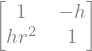

In [14]:
from sympy import *
init_printing()
h, r = symbols('h, r', positive=True)
B = Matrix([[1, -h], [h*r**2, 1]])
B 

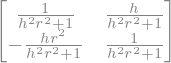

In [15]:
# inverse of B
B**-1

In [16]:
# eigenvalues as a list
L = list((B**-1).eigenvals().keys())

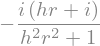

In [17]:
# First eigenvalue
L[0].factor()

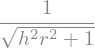

In [18]:
# Magnitude of first eigenvalue
abs(L[0].factor())

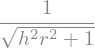

In [19]:
# Magnitude of 2nd eigenvalue
abs(L[1].factor())

$$\text{Recall}\quad
\begin{bmatrix}
    \widehat\phi_k^{m+1} \\
    \widehat\psi_k^{m+1}
\end{bmatrix}
=
\mathbf B^{-1}
\begin{bmatrix}
    \widehat\phi_k^{m} \\
    \widehat\psi_k^{m}
\end{bmatrix}.
$$
The eigenvalues of $\mathbf B^{-1}$ are $$\lambda_\pm = \frac{1\pm ihr}{1+h^2r^2}, \qquad |\lambda_\pm| = \frac{1}{\sqrt{1 + h^2r^2}} \leq 1.$$

* The eigenvalues are the growth factors and these are less than one.
* So the implicit method is unconditionally stable, but solutions decay exponentially! 
* For the wave equation, all Fourier components of our solution (except k=0) die away... meaning the wave solution cannot propagate!

## Crank-Nicolson Method for Hyperbolic Equations

Using C-N method for wave equation, discretization gives:
$$ 
\phi_m^{n+1} - \frac{h}2\psi_m^{n+1} = \phi_m^{n} + \frac{h}2\psi_m^{n}
$$
$$ \psi_m^{n+1} - \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right) = \psi_m^{n} + \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
$$

If we do the Von Neumann substitution, $\left(\phi_m^n, \psi_m^n\right) = \left(\widehat \phi_k^n, \widehat \psi_k^n\right)\exp(i kma)$, we get

$$\mathbf{B'}
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n}
\end{bmatrix},
$$
or 
$$
\begin{bmatrix}
    \widehat\phi_m^{n+1} \\
    \widehat\psi_m^{n+1}
\end{bmatrix}
=
\mathbf{B'^{-1}A'}
\begin{bmatrix}
    \widehat\phi_m^{n} \\
    \widehat\psi_m^{n},
\end{bmatrix}
$$
with
$$
\mathbf{B'^{-1}A'}
= \frac{a}{1 + h^2 r'^2}
\begin{bmatrix}
    1 - h^2 r'^2 & 2 h \\
    -2hr'^2 & 1-h^2r'^2
\end{bmatrix},
\quad r' = \frac{c}{a}\sin\frac{ka}{2}
$$

Growth factors of Crank-Nicolson are eigenvalues of $\mathbf{B^{-1}A}$:
$$\lambda_\pm = \frac{1 \pm 2ihr' - h^2 r'^2}{1 + h^2 r'^2},\quad \boxed{|\lambda_\pm| = 1}.$$

Growth factors are one, so the solution neither grows nor decays.

# Verlet Method


* Guaranteed time-reversible and energy-conserving method for the special case of two coupled ODEs, with LHS and RHS having separated variables
* e.g. Newton's 2nd law for conservative forces:
$$\frac {d^2 x}{dt^2} = \frac{F(x)}m \quad \Rightarrow \quad \frac{dx}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(x)}{m}.$$
1st ODE: $x$ on LHS, $v$ on RHS; 2nd ODE: $v$ on LHS, $x$ on RHS.
$$\color{green}{x(t+h)} = x(t) + h \color{blue}{v\left(t+ \frac{h}2\right)},$$
$$v\left(t+\frac{3}{2}h\right) = \color{blue}{v\left(t + \frac{h}2\right)} + h\frac{F( \color{green}{x(t+h)} )}m.$$

$$\color{green}{x(t+h)} = x(t) + h \color{blue}{v\left(t+ \frac{h}2\right)},$$
$$v\left(t+\frac{3}{2}h\right) = \color{blue}{v\left(t + \frac{h}2\right)} + h\frac{F( \color{green}{x(t+h)} )}m.$$
* It's a 2-variable leapfrog-based method, at half the cost of leapfrog
* If diagnostics (like energy) are needed at specific time steps, we need to recompute the $\color{blue}{\text{half-step quantities}} $

# Spectral Methods

For linear PDEs:

* Find yourself a set of orthogonal functions forming a basis of your function space
* Use transforms to express trial solution and its derivative(s) in this basis, with unknown coefficients
  * Remember, any linear combination of solutions is also itself a solution
* Use transforms to project initial conditions onto that basis, and use them to determine the coefficients
* Use inverse transforms to directly obtain the solution at any specified coordinates (e.g. at any time $t$, without stepping through all the previous time-steps)


Features:
* Particularly useful with large sets of coupled PDEs, for which just one elliptic PDE can be the main bottleneck of a non-spectral implementation
* Very accurate
* But inflexible when it comes to domain shape.

## Basis of function space

Examples of "set of orthogonal functions forming a basis of your function space":

 * $\sin(n\pi x/L)$, $n\in \mathbb N$ if quantity is zero at boundaries (assuming $x=0$, $L$ are the boundaries) or function is odd w.r.t. midline of domain (assuming $x=0$ at midline),
 * $\cos(n\pi x/L)$, $n\in \mathbb N$ if quantity has zero derivatives at boundaries (assuming $x=0$, $L$ are the boundaries) or function is even w.r.t. midline of domain (assuming $x=0$ at midline),
 * $\exp(i n\pi x/L)$, $n\in \mathbb N$ if quantity is periodic,
 * Chebyshev polynomials for more flexible combinations of boundary conditions or non-periodic, closed domains,
 * Hermite polynomials on the $(-\infty, \infty)$ real line,
 * Laguerre polynomials on the $(0, \infty)$ real half-line

We focus on $\sin$/$\cos$/$\exp$ bases, sometimes called "Fourier spectral methods"

* $\ominus$ large down-payment cost of computing FFTs
* $\oplus$ large return on investment: gives you the solution at any times without stepping through previous times
  * e.g. elliptic PDEs can be solved without the need of an iterative solver like relaxation method
* $\oplus$ numerical stability
* $\ominus$ difficult or impossible to implement in complicated geometries.
* $\ominus$ problematic for non-linear equations

e.g. for elliptic PDEs:
$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = \rho;$$
$$\binom{\phi}{\rho} = \sum_i\sum_j \binom{\widehat\phi_{ij}}{\widehat\rho_{ij}}\exp(i(k_ix + \ell_jy)),$$
$$\text{Use orthogonality to project } \Rightarrow \widehat\phi_{ij} = -\frac{\widehat\rho_{ij}}{k_i^2 + \ell_j^2}$$
and you are just one iFFT away from getting the solution $\Rightarrow$ no need to use an iterative solver!

## Practical implementation in sin/cos/exp basis

$$f = \sum_{n=-\infty}^{\infty} \hat f_n \exp(i k_n x) \Rightarrow \frac{\partial f}{\partial x} = \sum_{n=-\infty}^{\infty} i k_n \hat f_n \exp(i k_n x),$$
or, in shorthand,
$$\frac{\partial f}{\partial x} \to i k_n\hat f_n, \quad \frac{\partial^2 f}{\partial x^2} \to -k_n^2\hat f_n$$

Next are a couple of examples of how to express functions and their derivatives in sin/cos/exp basis

### First derivative

$$ f(x) = \exp \left( \frac{-(x-L/2)^2}{\Delta^2} \right) $$

In [1]:
# Based on derivative_fft.py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

#define function and its derivative
def f(x):
    return np.exp(-(x-L/2)**2/Delta**2)
def dfdx(x):
    return -2*(x-L/2)/Delta**2*np.exp(-(x-L/2)**2/Delta**2)

# define problem parameters
L = 2.0
Delta = 0.1
nx = 200

# define x, f(x), f'(x)
x = np.arange(0, L, L/nx)
farr = f(x)
farr_derivative = dfdx(x)

In [3]:
# now do the same thing spectrally:
fhat = rfft(farr)  # fourier transform
karray = np.arange(nx/2+1)*2*np.pi/L  # define k
fhat_derivative = complex(0, 1)*karray*fhat  # define ik*fhat
f_derivative_fft = irfft(fhat_derivative)  # and transform back

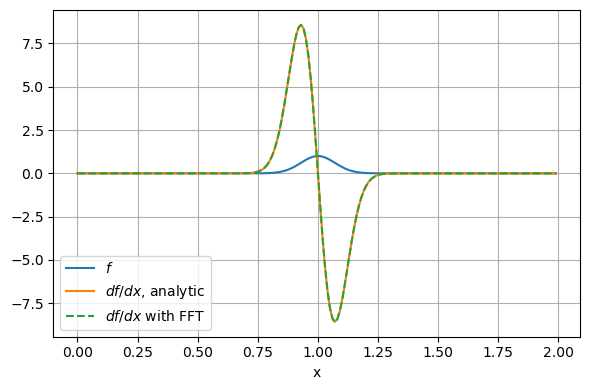

In [5]:
plt.figure(dpi=100)
plt.plot(x, farr, label='$f$')
plt.plot(x, farr_derivative, label='$df/dx$, analytic')
plt.plot(x, f_derivative_fft, '--', label='$df/dx$ with FFT')
plt.legend(loc=3)
plt.xlabel('x')
plt.grid()
plt.tight_layout()
plt.show()

### Second derivative

$$ f = \sin(x) - 2\sin(4x) + 3\sin(5x) - 4\sin(6x)$$

In [2]:
import numpy as np
from dcst import dst, idst, dct, idct  # From Newman's dcst.py

N = 256
x = np.arange(N)*np.pi/N  # x = pi*n/N
farr = np.sin(x) - 2*np.sin(4*x) + 3*np.sin(5*x) - 4*np.sin(6*x)  # function is a sine series
fCoeffs = dst(farr)  # do fourier sine series
print('Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)')
for j in range(7):
    print('Coefficient of sin({0}x): {1:.2e}'.format(j, fCoeffs[j]/N))

Original series: f = sin(x) - 2sin(4x) + 3sin(5x) - 4sin(6x)
Coefficient of sin(0x): 0.00e+00
Coefficient of sin(1x): 1.00e+00
Coefficient of sin(2x): -4.58e-17
Coefficient of sin(3x): -5.64e-16
Coefficient of sin(4x): -2.00e+00
Coefficient of sin(5x): 3.00e+00
Coefficient of sin(6x): -4.00e+00


In [3]:
# Below: 2nd derivative also a sine series
d2f_dx2_a = -np.sin(x) + 32*np.sin(4*x) - 75*np.sin(5*x) + 144*np.sin(6*x)

# 2nd derivative using Fourier transform
DerivativeCoeffs = -np.arange(N)**2*fCoeffs  
d2f_dx2_b = idst(DerivativeCoeffs)

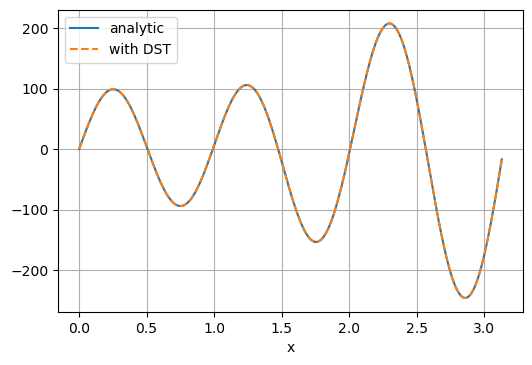

In [12]:
plt.figure(dpi=100)
plt.plot(x, d2f_dx2_a, label='analytic')
plt.plot(x, d2f_dx2_b, '--', label='with DST')
plt.xlabel('x')
plt.legend()
plt.grid()
plt.show()

# Boundary Value Problems

A combination of ODE-solving and root-finding

## Shooting method

* Suppose we want to choose an initial velocity $v_0$ for a projectile to land after a certain elapsed time (e.g. $t_L = 10$ s), where the projectile obeys Newton's 2nd Law:
$$\frac {d^2 x}{dt^2} = \frac{F(x)}m \quad \Rightarrow \quad \frac{dx}{dt} = v\quad \text{and}\quad \frac{dv}{dt} = \frac{F(x)}{m}.$$
* $x(v_0, t)$ is a nonlinear function of $v_0$, and finding $x(v_0, t=t_L)$ can be done using root finding method (binary search, secant...)
* **Shooting method:** integrate the equations and adjust $v_0$ until you locate root.

![Newman fig. 8.11](fig8-11.png)

## Eigenvalue Problems

$$-\frac{\hbar}{2 m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi,$$
$$\psi(x=0) = \psi(x=L) = 0.$$

* Shooting method does not work for finding wavefunctions that satisfy two boundary conditions, as in QM square well, except for valid eigenvalues $E$.
* So for these problems, eigenvalue $E$ is the parameter that must be varied, instead of the boundary values (e.g. slope of $\psi$ at the leftmost end or rightmost end of the domain)